It originates from: https://www.kaggle.com/code/youssefelbadry10/digits-classification-tensorflow-pytorch/notebook

# **CNN Digits Classification | TensorFlow & PyTorch**

<img height=1000 width=1000 src="https://cdn.activestate.com/wp-content/uploads/2019/10/neural-network-showndown-tensorflow-vs-pytorch.png" />

# **Import Libraries**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('..\\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

..\data\t10k-images.idx3-ubyte
..\data\t10k-labels.idx1-ubyte
..\data\train-images.idx3-ubyte
..\data\train-labels.idx1-ubyte
..\data\t10k-images-idx3-ubyte\t10k-images-idx3-ubyte
..\data\t10k-labels-idx1-ubyte\t10k-labels-idx1-ubyte
..\data\train-images-idx3-ubyte\train-images-idx3-ubyte
..\data\train-labels-idx1-ubyte\train-labels-idx1-ubyte


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms 
from torchvision.datasets import ImageFolder
import timm  # It is a library that provides a collection of pre-trained models
import sys
from tqdm.notebook import tqdm #display progress bars 

# **TensorFlow Model Acc= 97.26%**

In [3]:
(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("The Shape of train data : ", x_train.shape )
print("The Shape of test data : ", x_test.shape )

The Shape of train data :  (60000, 28, 28)
The Shape of test data :  (10000, 28, 28)


In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

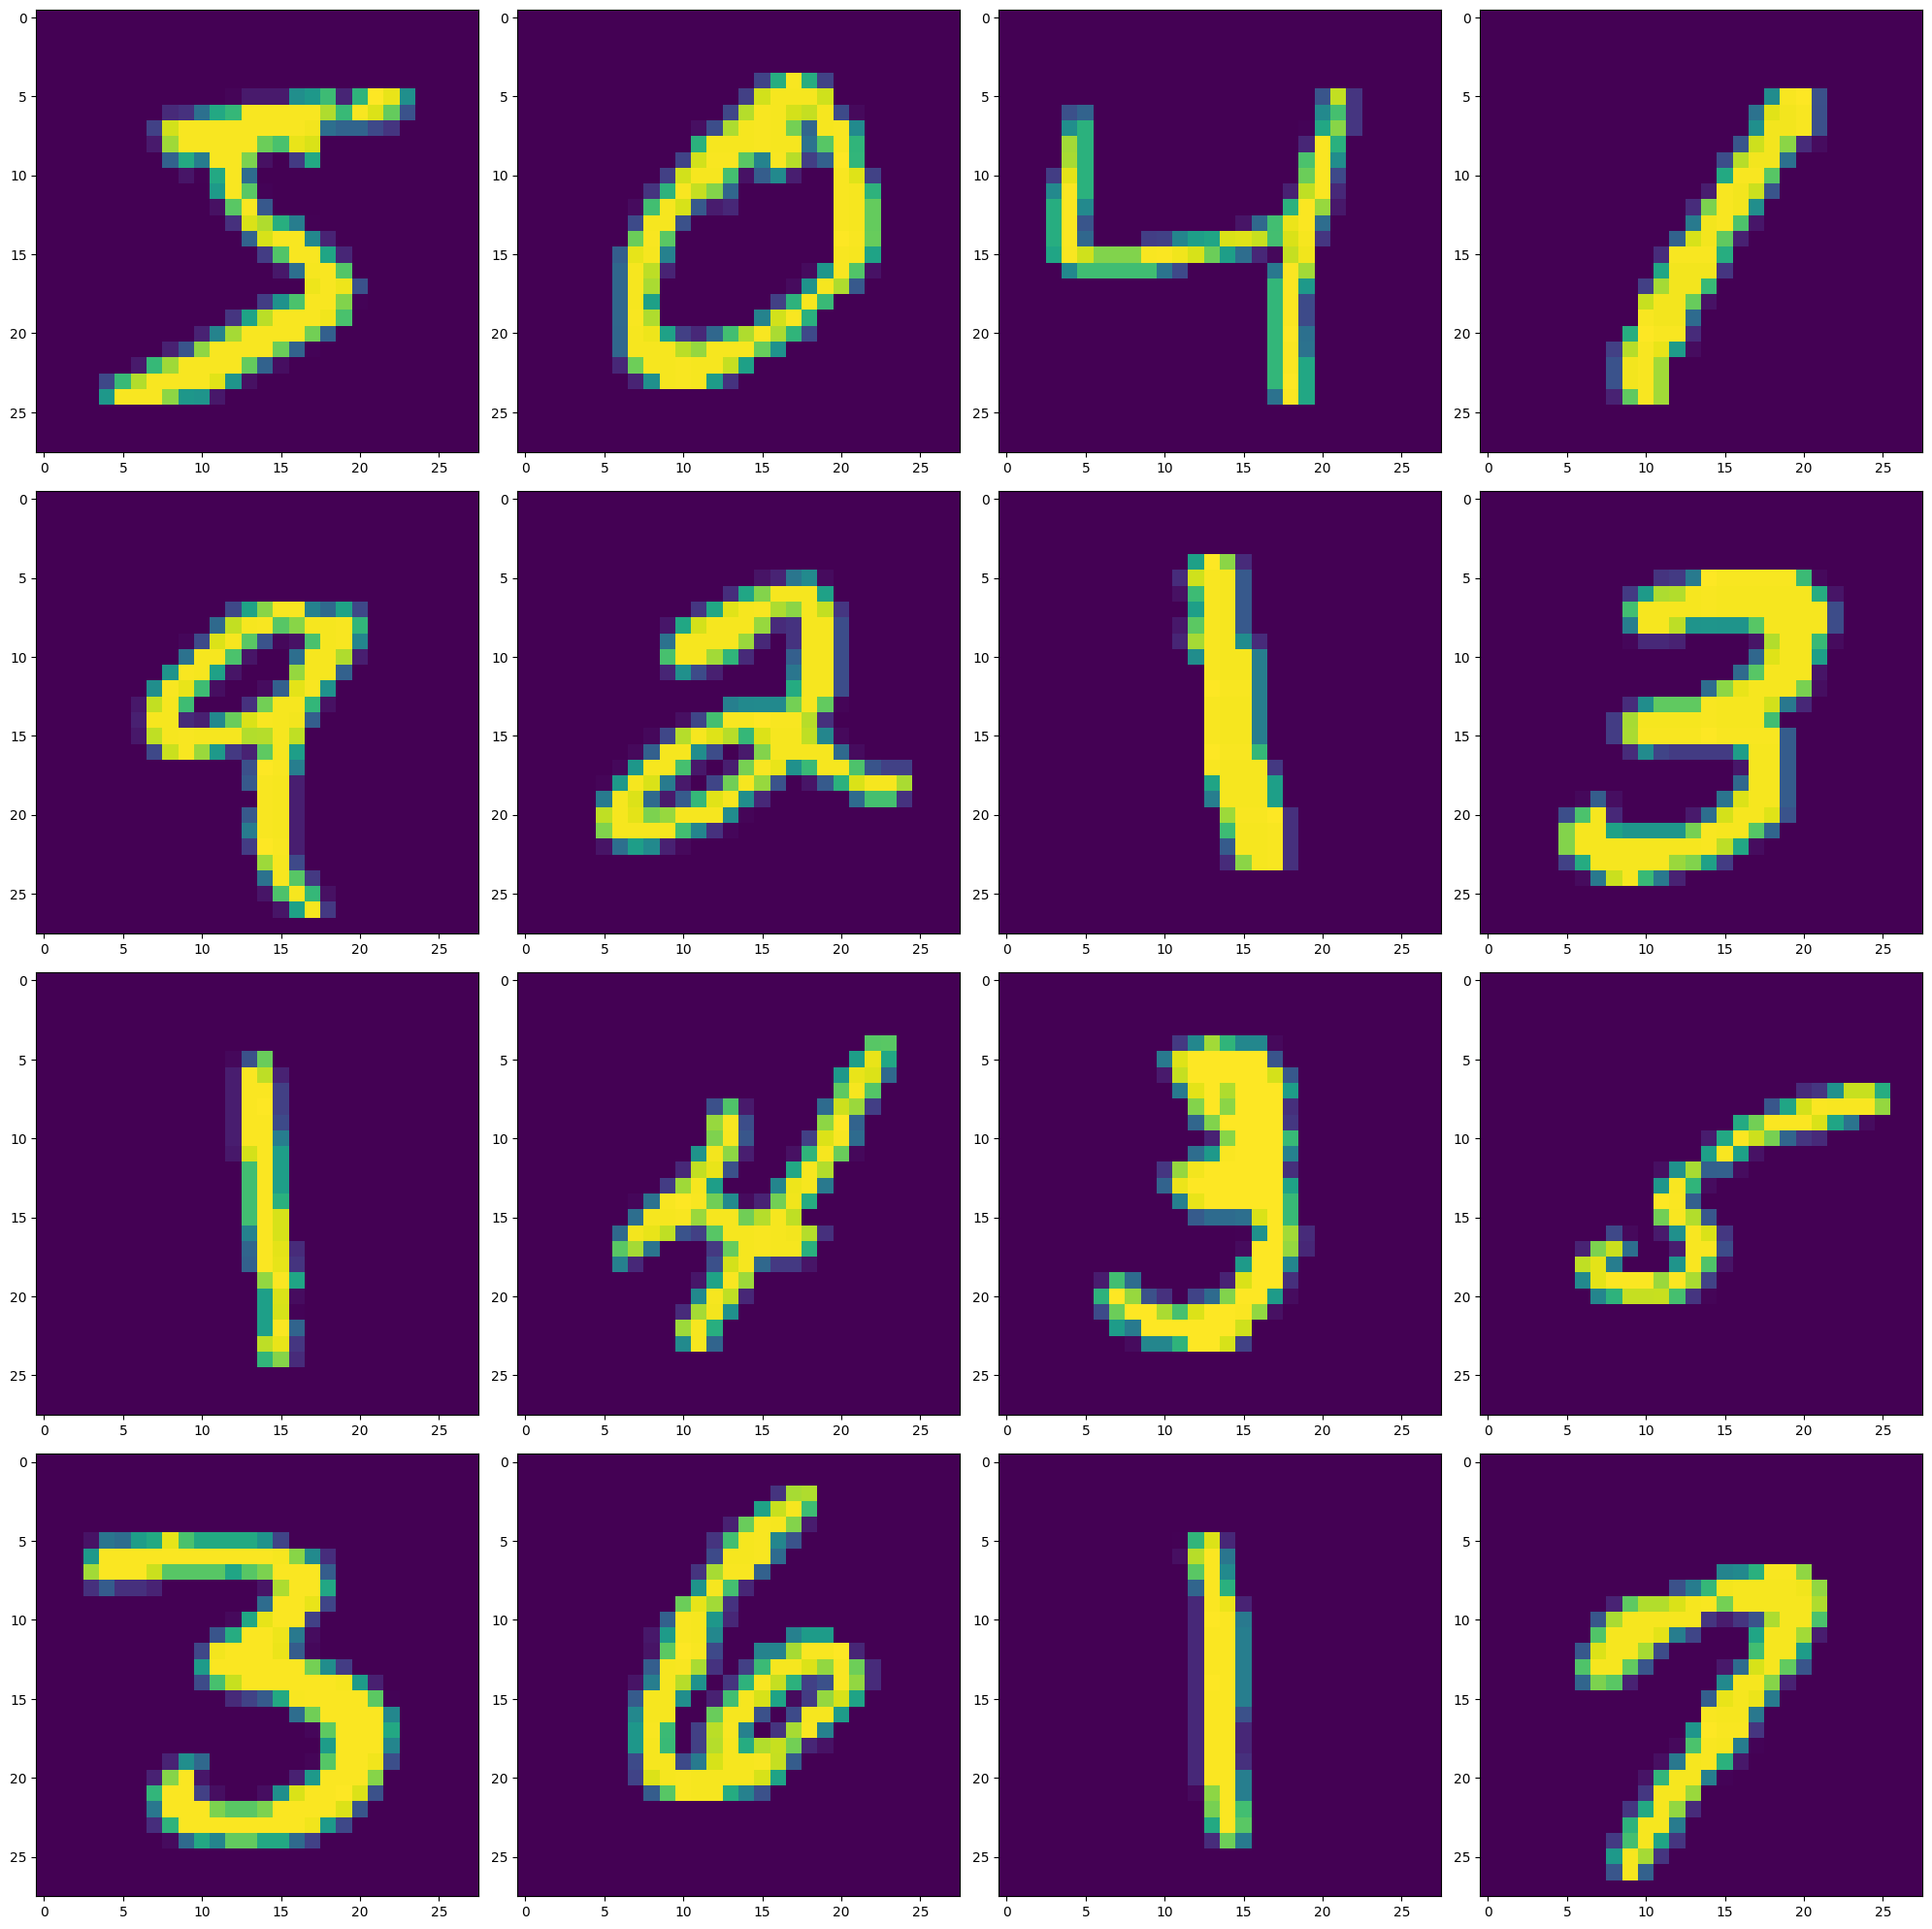

In [6]:
plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])

plt.tight_layout()  
plt.show()

In [7]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
X_train = x_train / 255
X_test = x_test / 255

In [9]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = Sequential()

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy']) 
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [12]:
history = model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10


I0000 00:00:1727605435.210980      71 service.cc:145] XLA service 0x7fc068007700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727605435.211028      71 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 102/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6152 - loss: 1.4406

I0000 00:00:1727605436.303945      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8650 - loss: 0.4919 - val_accuracy: 0.9548 - val_loss: 0.1556
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9593 - loss: 0.1346 - val_accuracy: 0.9555 - val_loss: 0.1436
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9727 - loss: 0.0889 - val_accuracy: 0.9677 - val_loss: 0.1025
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0713 - val_accuracy: 0.9716 - val_loss: 0.0957
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9836 - loss: 0.0529 - val_accuracy: 0.9722 - val_loss: 0.0989
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0416 - val_accuracy: 0.9732 - val_loss: 0.0965
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0366 - val_accuracy: 0.9732 - val_loss: 0.0957
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0340 - val_accurac

In [13]:
y_prod = model.predict(X_test)
y_pred = y_prod.argmax(axis=1) # return the index of the class with the highest probability for each prediction, which corresponds to the predicted label.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
# Convert one-hot encoded y_test to class labels (if it's not already)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

In [15]:
print("The accuracy score is : " , accuracy_score(y_test,y_pred))

The accuracy score is :  0.9718


## Accuracy graph

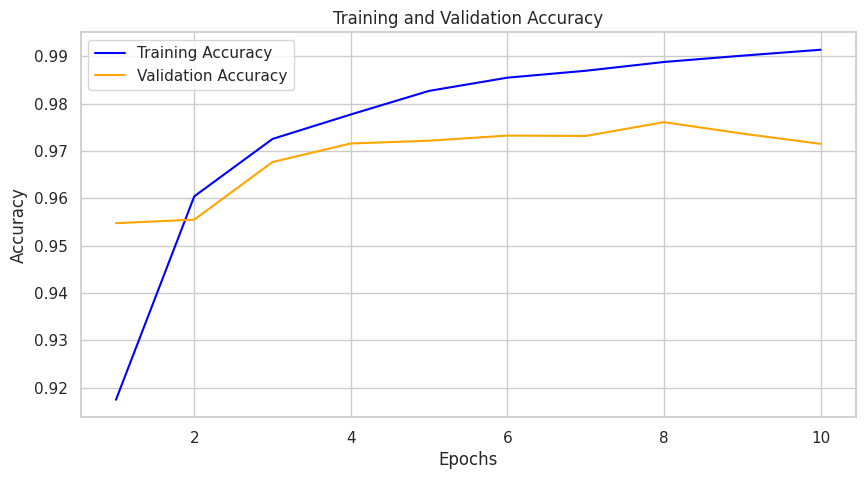

In [16]:
sns.set(style='whitegrid')


plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), 
             y=history.history['accuracy'], 
             label='Training Accuracy', 
             color='blue')


sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), 
             y=history.history['val_accuracy'], 
             label='Validation Accuracy', 
             color='orange')


plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss graph

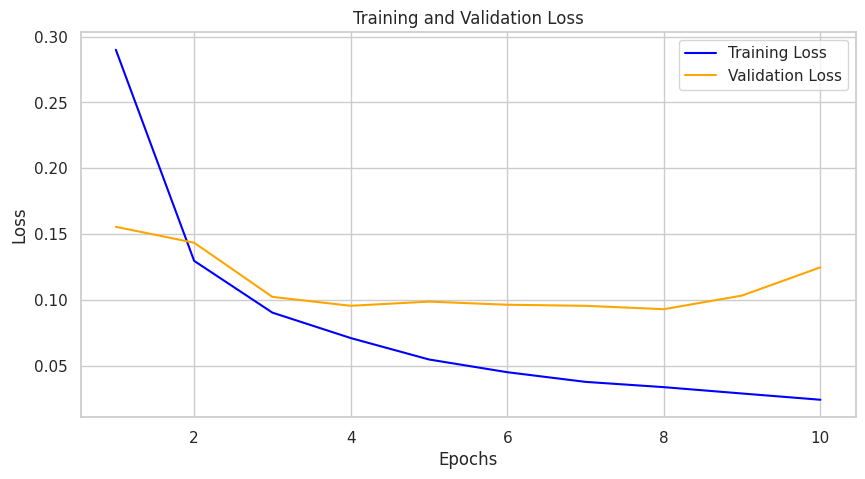

In [17]:
sns.set(style='whitegrid')


plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, len(history.history['loss']) + 1), 
             y=history.history['loss'], 
             label='Training Loss', 
             color='blue')


sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), 
             y=history.history['val_loss'], 
             label='Validation Loss', 
             color='orange')


plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **PyTorch Model Acc= 99.02%**

In [18]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 52522238.66it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1623737.57it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12665377.52it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2316455.35it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [19]:
# Step 2: Define the CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # 1 input channel (grayscale), 16 output channels, 3x3 convolution
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 pooling
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # 32 filters, 7x7 image size
        self.fc2 = nn.Linear(128, 10)  # 10 output classes (digits 0-9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Convolution -> ReLU -> MaxPooling
        x = self.pool(F.relu(self.conv2(x)))  # Another conv -> ReLU -> MaxPooling
        x = x.view(-1, 32 * 7 * 7)  # Flatten the tensor for fully connected layer
        x = F.relu(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output layer (no activation needed, we'll use softmax in the loss function)
        return x

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)

In [21]:
criterion = nn.CrossEntropyLoss()  # Loss function (since this is a classification task)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer (Adam)

In [22]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Example using Adam optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification

# Step 4: Training the Model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)  # Number of labels
        correct += (predicted == labels).sum().item()  # Count correct predictions

    # Calculate average loss and accuracy
    average_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')



Epoch [1/10], Loss: 0.2123, Accuracy: 93.83%
Epoch [2/10], Loss: 0.0570, Accuracy: 98.24%
Epoch [3/10], Loss: 0.0386, Accuracy: 98.77%
Epoch [4/10], Loss: 0.0289, Accuracy: 99.10%
Epoch [5/10], Loss: 0.0220, Accuracy: 99.30%
Epoch [6/10], Loss: 0.0189, Accuracy: 99.39%
Epoch [7/10], Loss: 0.0143, Accuracy: 99.50%
Epoch [8/10], Loss: 0.0122, Accuracy: 99.57%
Epoch [9/10], Loss: 0.0090, Accuracy: 99.71%
Epoch [10/10], Loss: 0.0088, Accuracy: 99.68%


In [23]:
# Step 5: Evaluate the Model
model.eval()  
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model: {100 * correct / total:.2f}%')

Accuracy of the model: 98.95%
